# Forbes Billionaires Dataset 2022

The World's Billionaires is an annual ranking by documented net worth of the wealthiest billionaires in the world, compiled and published in March annually by the American business magazine Forbes.

Each year, Forbes employs a team of over 50 reporters from a variety of countries to track the activity of the world's wealthiest individuals and sometimes groups or families – who share wealth. Preliminary surveys are sent to those who may qualify for the list.

### EDA Process

In [1]:
#Importing neccessary libraires 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.io as pio


In [2]:
df = pd.read_csv('Forbes Billionaires.csv')
df

,Rank,Name,Networth,Age,Country,Source,Industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail


In [3]:
# checking the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      2600 non-null   int64  
 1   Name      2600 non-null   object 
 2   Networth  2600 non-null   float64
 3   Age       2600 non-null   int64  
 4   Country   2600 non-null   object 
 5   Source    2600 non-null   object 
 6   Industry  2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 142.3+ KB


Let's see who has the highest net worth

In [4]:
# checking any null values
df.isnull().sum()

Rank        0
Name        0
Networth    0
Age         0
Country     0
Source      0
Industry    0
dtype: int64

We haven't got any null values in the dataset.
The data is clean

In [5]:
# checking the data type of each column
df.dtypes

Rank          int64
Name         object
Networth    float64
Age           int64
Country      object
Source       object
Industry     object
dtype: object

In [6]:
df.loc[df.Networth == df['Networth'].max()]

,Rank,Name,Networth,Age,Country,Source,Industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive


Let's see who is the youngest billionaire

In [7]:
df.loc[df.Age == df['Age'].min()]

,Rank,Name,Networth,Age,Country,Source,Industry
1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion & Retail


And who's the oldest among them

In [8]:
# Youngest Billionaire
df.loc[df.Age == df['Age'].max()]

,Rank,Name,Networth,Age,Country,Source,Industry
1681,1645,George Joseph,1.8,100,United States,insurance,Finance & Investments


Let's see which country the billionaires belong to

<AxesSubplot:ylabel='Country'>

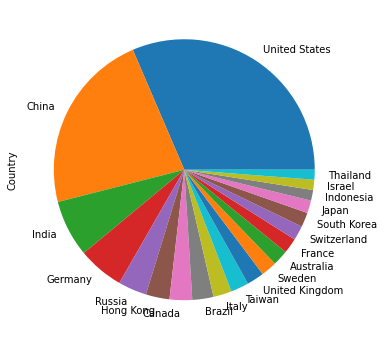

In [9]:
# creating a pie-chart of the countries where billionaires are from
# plt.pie(df.Country.value_counts(), labels=df.Country.value_counts().head(20).index, autopct='%1.1f%%')
df['Country'].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))


Let's look at the net worth of billionaires in the top 5 countries

In [14]:
pio.templates.default = "plotly_dark"
dfg = df['Country'].value_counts().head(5)
dfg
# plotting the bar-chart in plotly
import plotly.graph_objects as px
fig = px.Figure(data=[px.Bar(x=dfg.index, y=dfg)], layout=px.Layout(title='Top 5 countries with the highest number of billionaires'))
# adding labels
fig.update_xaxes(title_text='Countries')
fig.update_yaxes(title_text='Number of billionaires')
fig.show()

We can see that the billionaires are mostly from the US, China, and India.

Now let's see the distribution of billionaires in India and get some insights.

In [15]:
# getting the top 5 billionaires in India
#  who has maximum networth and plotting a bar-chart in plolty

df.loc[df.Country == 'India'].sort_values(by = 'Networth', ascending = False).head(5)
# plotting the bar-chart in plotly
import plotly.graph_objects as px
# setting x axis as names of billionaires
x = df.loc[df.Country == 'India'].sort_values(by = 'Networth', ascending = False).head(5)['Name']
fig = px.Figure(data=[px.Bar(x=x, y=df.loc[df.Country == 'India'].sort_values(by = 'Networth', ascending = False).head(5).Networth)], layout=px.Layout(title='Top 5 billionaires in India'))
# adding labels
fig.update_xaxes(title_text='Billionaires')
fig.update_yaxes(title_text='Networth')
# adding a legend
fig.update_layout(legend=dict(x=0, y=1.05))
fig.show()

Let's look at Biillionaire distribution by Age and Net Worth

In [16]:
import plotly.express as px
pio.templates.default = "plotly_dark"
fig = px.bar(df, x = "Age", y = "Networth",color='Networth', title = "Billionaires by their age")
fig.show()

In [17]:
import plotly.express as px
pio.templates.default = "plotly_white"
Cumilative_Net_Industry=df.groupby(['Industry']).sum().sort_values('Networth',ascending = False)
Cumilative_Net_Industry.reset_index(inplace = True)
pio.templates.default = "plotly_dark"
fig = px.bar(df, x = "Networth", y = "Industry",color='Industry', title = "Billionaires company")
fig.show()